# Cleaning up the Zillow Inventory & Median Sales Data for Metro US 


## 2.1 Contents<a id='2.1_Contents'></a>
* [2 Data wrangling](#2_Data_wrangling)
  * [2.1 Contents](#2.1_Contents)
  * [2.2 Introduction](#2.2_Introduction)
    * [2.2.1 Recap Of Data Science Problem](#2.2.1_Recap_Of_Data_Science_Problem)
    * [2.2.2 Introduction To Notebook](#2.2.2_Introduction_To_Notebook)
  * [2.3 Imports](#2.3_Imports)
  * [2.4 Objectives](#2.4_Objectives)
  * [2.5 Load The Ski Resort Data](#2.5_Load_The_Ski_Resort_Data)
  * [2.6 Explore The Data](#2.6_Explore_The_Data)
    * [2.6.1 Find Your Resort Of Interest](#2.6.1_Find_Your_Resort_Of_Interest)
    * [2.6.2 Number Of Missing Values By Column](#2.6.2_Number_Of_Missing_Values_By_Column)
    * [2.6.3 Categorical Features](#2.6.3_Categorical_Features)
      * [2.6.3.1 Unique Resort Names](#2.6.3.1_Unique_Resort_Names)
      * [2.6.3.2 Region And State](#2.6.3.2_Region_And_State)
      * [2.6.3.3 Number of distinct regions and states](#2.6.3.3_Number_of_distinct_regions_and_states)
      * [2.6.3.4 Distribution Of Resorts By Region And State](#2.6.3.4_Distribution_Of_Resorts_By_Region_And_State)
      * [2.6.3.5 Distribution Of Ticket Price By State](#2.6.3.5_Distribution_Of_Ticket_Price_By_State)
        * [2.6.3.5.1 Average weekend and weekday price by state](#2.6.3.5.1_Average_weekend_and_weekday_price_by_state)
        * [2.6.3.5.2 Distribution of weekday and weekend price by state](#2.6.3.5.2_Distribution_of_weekday_and_weekend_price_by_state)
    * [2.6.4 Numeric Features](#2.6.4_Numeric_Features)
      * [2.6.4.1 Numeric data summary](#2.6.4.1_Numeric_data_summary)
      * [2.6.4.2 Distributions Of Feature Values](#2.6.4.2_Distributions_Of_Feature_Values)
        * [2.6.4.2.1 SkiableTerrain_ac](#2.6.4.2.1_SkiableTerrain_ac)
        * [2.6.4.2.2 Snow Making_ac](#2.6.4.2.2_Snow_Making_ac)
        * [2.6.4.2.3 fastEight](#2.6.4.2.3_fastEight)
        * [2.6.4.2.4 fastSixes and Trams](#2.6.4.2.4_fastSixes_and_Trams)
  * [2.7 Derive State-wide Summary Statistics For Our Market Segment](#2.7_Derive_State-wide_Summary_Statistics_For_Our_Market_Segment)
  * [2.8 Drop Rows With No Price Data](#2.8_Drop_Rows_With_No_Price_Data)
  * [2.9 Review distributions](#2.9_Review_distributions)
  * [2.10 Population data](#2.10_Population_data)
  * [2.11 Target Feature](#2.11_Target_Feature)
    * [2.11.1 Number Of Missing Values By Row - Resort](#2.11.1_Number_Of_Missing_Values_By_Row_-_Resort)
  * [2.12 Save data](#2.12_Save_data)
  * [2.13 Summary](#2.13_Summary)

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#This is for loading the data on a windows computer. 
"""cwd_path = os.getcwd()
data_path = cwd_path[:-9] + '\\data\\raw'
data_file = 'Metro_invt_fs_uc_sfrcondo_raw_week.csv'

file_path = data_path + '\\' + data_file
os.chdir(data_path)
os.listdir()"""


"cwd_path = os.getcwd()\ndata_path = cwd_path[:-9] + '\\data\\raw'\ndata_file = 'Metro_invt_fs_uc_sfrcondo_raw_week.csv'\n\nfile_path = data_path + '\\' + data_file\nos.chdir(data_path)\nos.listdir()"

The following code is used to load the csv files from Google Drive. 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
filename_median = 'Metro_median_sale_price_uc_SFR_raw_week.csv'
filename_inventory = 'Metro_invt_fs_uc_sfrcondo_raw_week.csv'
rawdata_path = '/content/drive/My Drive/colab/zillow/data/raw/'

mediansales_path= rawdata_path+filename_median
inventory_path = rawdata_path+filename_inventory

df_med = pd.read_csv(mediansales_path)
df_inv = pd.read_csv(inventory_path)

In [5]:
df_med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Columns: 671 entries, RegionID to 2020-10-31
dtypes: float64(666), int64(2), object(3)
memory usage: 508.6+ KB


In [6]:
df_inv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Columns: 169 entries, RegionID to 2020-11-28
dtypes: float64(164), int64(2), object(3)
memory usage: 128.2+ KB


In [7]:
print('Median Sales Price DF ', df_med.nunique())
print()
print('Inventory Sales DF', df_inv.nunique())

Median Sales Price DF  RegionID      97
SizeRank      97
RegionName    97
RegionType     2
StateName     40
              ..
2020-10-03    85
2020-10-10    90
2020-10-17    90
2020-10-24    87
2020-10-31    89
Length: 671, dtype: int64

Inventory Sales DF RegionID      97
SizeRank      97
RegionName    97
RegionType     2
StateName     40
              ..
2020-10-31    94
2020-11-07    96
2020-11-14    96
2020-11-21    96
2020-11-28    97
Length: 169, dtype: int64


# Cleaning up the Zillow Inventory Data for Metro Regions
The data is loaded in wide format. 
Cleaning the data: 

*   Melt the timestamp data and use as the index
*   Convert the timestamp data into type datetime.
*   Look for missing values
*   Drop irrelevant columns
*   Make a list of regions separate from the dataframe to reduce redundancy and clean up the dataframe. 


In [8]:
df_inv.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2017-10-14,2017-10-21,2017-10-28,2017-11-04,2017-11-11,2017-11-18,2017-11-25,2017-12-02,2017-12-09,2017-12-16,2017-12-23,2017-12-30,2018-01-06,2018-01-13,2018-01-20,2018-01-27,2018-02-03,2018-02-10,2018-02-17,2018-02-24,2018-03-03,2018-03-10,2018-03-17,2018-03-24,2018-03-31,2018-04-07,2018-04-14,2018-04-21,2018-04-28,2018-05-05,2018-05-12,2018-05-19,2018-05-26,2018-06-02,2018-06-09,...,2020-02-29,2020-03-07,2020-03-14,2020-03-21,2020-03-28,2020-04-04,2020-04-11,2020-04-18,2020-04-25,2020-05-02,2020-05-09,2020-05-16,2020-05-23,2020-05-30,2020-06-06,2020-06-13,2020-06-20,2020-06-27,2020-07-04,2020-07-11,2020-07-18,2020-07-25,2020-08-01,2020-08-08,2020-08-15,2020-08-22,2020-08-29,2020-09-05,2020-09-12,2020-09-19,2020-09-26,2020-10-03,2020-10-10,2020-10-17,2020-10-24,2020-10-31,2020-11-07,2020-11-14,2020-11-21,2020-11-28
0,102001,0,United States,Country,NaN,1329553.0,1324548.0,1308531.0,1303129.0,1286621.0,1272333.0,1234947.0,1227505.0,1195416.0,1160149.0,1148194.0,1093337.0,1093250.0,1087475.0,1087958.0,1094620.0,1106129.0,1105860.0,1115048.0,1118538.0,1142503.0,1128157.0,1188209.0,1180119.0,1181779.0,1215663.0,1235118.0,1251990.0,1264064.0,1287461.0,1292470.0,1309224.0,1317716.0,1312313.0,1342281.0,...,1088469.0,1102433.0,1109522.0,1112495.0,1101957.0,1098407.0,1081841.0,1081417.0,1081583.0,1072815.0,1099381.0,1105393.0,1094354.0,1076661.0,1088115.0,1075586.0,1065208.0,1050500.0,1034941.0,1025225.0,1022963.0,1011201.0,999848.0,986761.0,979604.0,973036.0,965538.0,974262.0,951523.0,955963.0,946262.0,931097.0,924736.0,916975.0,909612.0,891672.0,874996.0,861239.0,847452.0,802818.0
1,394913,1,"New York, NY",Msa,NY,67462.0,67333.0,66334.0,65836.0,64317.0,63556.0,61355.0,61132.0,59148.0,57239.0,55864.0,53023.0,52815.0,52195.0,52794.0,53632.0,54821.0,58028.0,57679.0,57985.0,61192.0,60462.0,63044.0,62923.0,64013.0,64969.0,66129.0,68286.0,69644.0,71628.0,72056.0,73438.0,73499.0,73989.0,75705.0,...,62055.0,62682.0,63978.0,62458.0,63565.0,60083.0,57016.0,56033.0,55285.0,55205.0,56029.0,56237.0,55877.0,56161.0,58371.0,59000.0,59862.0,61344.0,61739.0,62977.0,63472.0,64409.0,63913.0,63273.0,64047.0,64308.0,64710.0,64749.0,65020.0,65717.0,65793.0,65908.0,66114.0,65429.0,65258.0,64337.0,63000.0,62334.0,61324.0,58814.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,18029.0,17845.0,17296.0,17018.0,16648.0,16415.0,15440.0,15306.0,14660.0,13767.0,13532.0,11851.0,12137.0,12805.0,13341.0,13724.0,14108.0,14699.0,14814.0,15071.0,15440.0,15020.0,16622.0,16186.0,15990.0,16756.0,17188.0,17834.0,17987.0,18620.0,18753.0,19175.0,19281.0,19303.0,20084.0,...,15426.0,15679.0,15595.0,15400.0,14604.0,14634.0,14576.0,14879.0,14945.0,15057.0,16094.0,16561.0,16978.0,17043.0,17479.0,17489.0,17531.0,17319.0,17180.0,17236.0,17409.0,17448.0,17439.0,17321.0,17384.0,17323.0,17309.0,17610.0,17444.0,17623.0,17673.0,17070.0,17188.0,17489.0,17623.0,17579.0,16702.0,16422.0,15988.0,14896.0
3,394463,3,"Chicago, IL",Msa,IL,38109.0,37722.0,37182.0,36553.0,35480.0,34548.0,32984.0,32434.0,31344.0,29967.0,29215.0,27315.0,26890.0,27151.0,27354.0,27518.0,27781.0,28151.0,28551.0,28878.0,30444.0,30540.0,32798.0,32362.0,32244.0,33349.0,34026.0,34564.0,34660.0,35423.0,35882.0,36361.0,36486.0,36793.0,37738.0,...,32255.0,33160.0,33753.0,33442.0,31761.0,30904.0,30356.0,30439.0,30612.0,30486.0,31685.0,31968.0,31803.0,31542.0,32238.0,32499.0,32568.0,32234.0,31517.0,31894.0,32118.0,31883.0,31579.0,31626.0,31307.0,31671.0,31452.0,31645.0,31269.0,31733.0,31633.0,31539.0,31627.0,31178.0,30902.0,30124.0,29637.0,28873.0,28088.0,26337.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,22104.0,21804.0,21751.0,21687.0,20961.0,20834.0,20066.0,19754.0,18977.0,18075.0,17977.0,16345.0,16091.0,16371.0,16718.0,16988.0,17332.0,17200.0,17490.0,17329.0,17547.0,17149.0,19088.0,19007.0,19150.0,20710.0,21092.0,21812.0,22182.0,22496.0,22723.0,23213.0,23466.0,23568.0,24259.0,...,24403.0,24831.0,25172.0,25107.0,24393.0,23987.0,23549.0,23786.0,24083.0,24040.0,25456.0,2

In [9]:
city_acronyms = {'NYC':'New York', 'SATX':'San Antonio', 'DFW':'Dallas-Fort Worth', 'ATX':'Austin'}

Create a list of Metro Regions (City/State) into a separate dictionary that can be called later. 

In [10]:
#Take the region names and turn it into a list and create a dictionary that will be used to store the city/state as key/values. 
regions = df_inv.RegionName.tolist()
region_state= {}

In [11]:
# Split the string "CITY, STATE" into "CITY" & " STATE"
# strip_state can be called to remove the leading whitespace in " STATE"
for city in regions:
  try:
    region_state[city.split(',', 1)[0]] = city.split(',', 1)[1].strip()
  except:
    pass
region_state



{'Akron': 'OH',
 'Albany': 'NY',
 'Albuquerque': 'NM',
 'Allentown': 'PA',
 'Atlanta': 'GA',
 'Augusta': 'GA',
 'Austin': 'TX',
 'Bakersfield': 'CA',
 'Baltimore': 'MD',
 'Baton Rouge': 'LA',
 'Birmingham': 'AL',
 'Boise City': 'ID',
 'Boston': 'MA',
 'Buffalo': 'NY',
 'Charleston': 'SC',
 'Charlotte': 'NC',
 'Chicago': 'IL',
 'Cincinnati': 'OH',
 'Cleveland': 'OH',
 'Colorado Springs': 'CO',
 'Columbia': 'SC',
 'Columbus': 'OH',
 'Dallas-Fort Worth': 'TX',
 'Dayton': 'OH',
 'Daytona Beach': 'FL',
 'Denver': 'CO',
 'Des Moines': 'IA',
 'Detroit': 'MI',
 'El Paso': 'TX',
 'Fort Collins': 'CO',
 'Fort Myers': 'FL',
 'Fresno': 'CA',
 'Grand Rapids': 'MI',
 'Greensboro': 'NC',
 'Greenville': 'SC',
 'Harrisburg': 'PA',
 'Hartford': 'CT',
 'Houston': 'TX',
 'Indianapolis': 'IN',
 'Jackson': 'MS',
 'Jacksonville': 'FL',
 'Kansas City': 'MO',
 'Knoxville': 'TN',
 'Lakeland': 'FL',
 'Las Vegas': 'NV',
 'Little Rock': 'AR',
 'Los Angeles-Long Beach-Anaheim': 'CA',
 'Louisville-Jefferson County':

In [12]:
def strip_state(name):
  """ This function strips the leading space from the text. """
  return name.split(',', 1)[0]

In [14]:
#The columns that will be dropped from the dataframe after melting. 
drop_columns = ['RegionName', 'SizeRank', 'StateName']

df_inv.drop(columns=['RegionID', 'RegionType'], inplace=True)
df_med.drop(columns=['RegionID', 'RegionType'], inplace=True)

In [15]:
#ny= df[df['RegionName']=='New York, NY']
#nymelt = pd.melt(ny, id_vars = ['RegionName', 'SizeRank', 'StateName'])
#nymelt['date'] = pd.to_datetime(nymelt['variable'])

def extract_region(regionname, df, drop_col, suffix=''):
  """regionname: Name of the region to be extracted. 
     df: The data frame containing the raw original data 
     drop_col: columns to be dropped after melting """

  # The function will do the following. 
  # Extracts the specified region from the zillow data
  # Melts dataframe
  # sets index to data timestamp 
  # Returns a dataframe
  
  
  # Creates a filter for to work with the specified regionname. 
  filterdf = df[df['RegionName']==regionname]
    
  tempmelt = pd.melt(filterdf, id_vars = ['RegionName', 'SizeRank', 'StateName'])
    
  #create a date column using the timestamp data 
  tempmelt['date'] = pd.to_datetime(tempmelt['variable'])
    
  #set the index to date 
  tempmelt.set_index('date', inplace=True)
    
  #drop the columns and variable from the df
  tempmelt.drop(columns=drop_col, inplace=True)
  tempmelt.drop(columns=['variable'], inplace=True)
    
  #extract the metro name from regionname 
  tempregion = strip_state(regionname)
    
  #creat the new name for the column 
  newname = tempregion + '_' + suffix

  #rename the column in place 
  tempmelt.rename(columns={'value':newname}, inplace=True)
    
  return tempmelt

In [16]:
#This will find the regions for the specified state and return a list of regions

def find_roi(state):
    roi = [r for r in regions if state in r]
    return roi


In [17]:
tx_regions = find_roi('TX')
tx_regions


['Dallas-Fort Worth, TX',
 'Houston, TX',
 'San Antonio, TX',
 'Austin, TX',
 'El Paso, TX',
 'McAllen, TX']

In [18]:
ca_regions = find_roi('CA')
ca_regions

['Los Angeles-Long Beach-Anaheim, CA',
 'San Francisco, CA',
 'Riverside, CA',
 'San Diego, CA',
 'Sacramento, CA',
 'San Jose, CA',
 'Fresno, CA',
 'Bakersfield, CA',
 'Ventura, CA',
 'Stockton, CA']

In [19]:
wi_regions = find_roi('WI')
wi_regions

['Milwaukee, WI', 'Madison, WI']

In [20]:
ny_regions = find_roi('NY')
ny_regions

['New York, NY', 'Buffalo, NY', 'Rochester, NY', 'Albany, NY', 'Syracuse, NY']

In [21]:
#Test the function to and make sure everything is working as intended. 

nyc = extract_region('New York, NY', df_inv, drop_columns, suffix='Inv')

Everything looks good with the nyc dataframe. 

In [22]:
nyc.head()

,New York_Inv
date,
2017-10-14,67462.0
2017-10-21,67333.0
2017-10-28,66334.0
2017-11-04,65836.0
2017-11-11,64317.0


In [28]:
def listofRegions(regions, data='', drop_col='', suffix=''):
  regionlist = list()
  for i in regions:
    regionlist.append(extract_region(i,data, drop_col=drop_columns, suffix=suffix))
  return regionlist

#tx_df_list = list()
#for i in tx_regions:
#    tx_df_list.append(extract_region(i, data, drop_col=drop_columns, suffix=suffix))
tx_df_list = listofRegions(tx_regions, data=df_inv, drop_col=drop_columns, suffix='Inv', )    
tx = pd.concat(tx_df_list, axis=1)


In [31]:
tx.dtypes

Dallas-Fort Worth_Inv    float64
Houston_Inv              float64
San Antonio_Inv          float64
Austin_Inv               float64
El Paso_Inv              float64
McAllen_Inv              float64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb46cf276a0>],
      dtype=object)

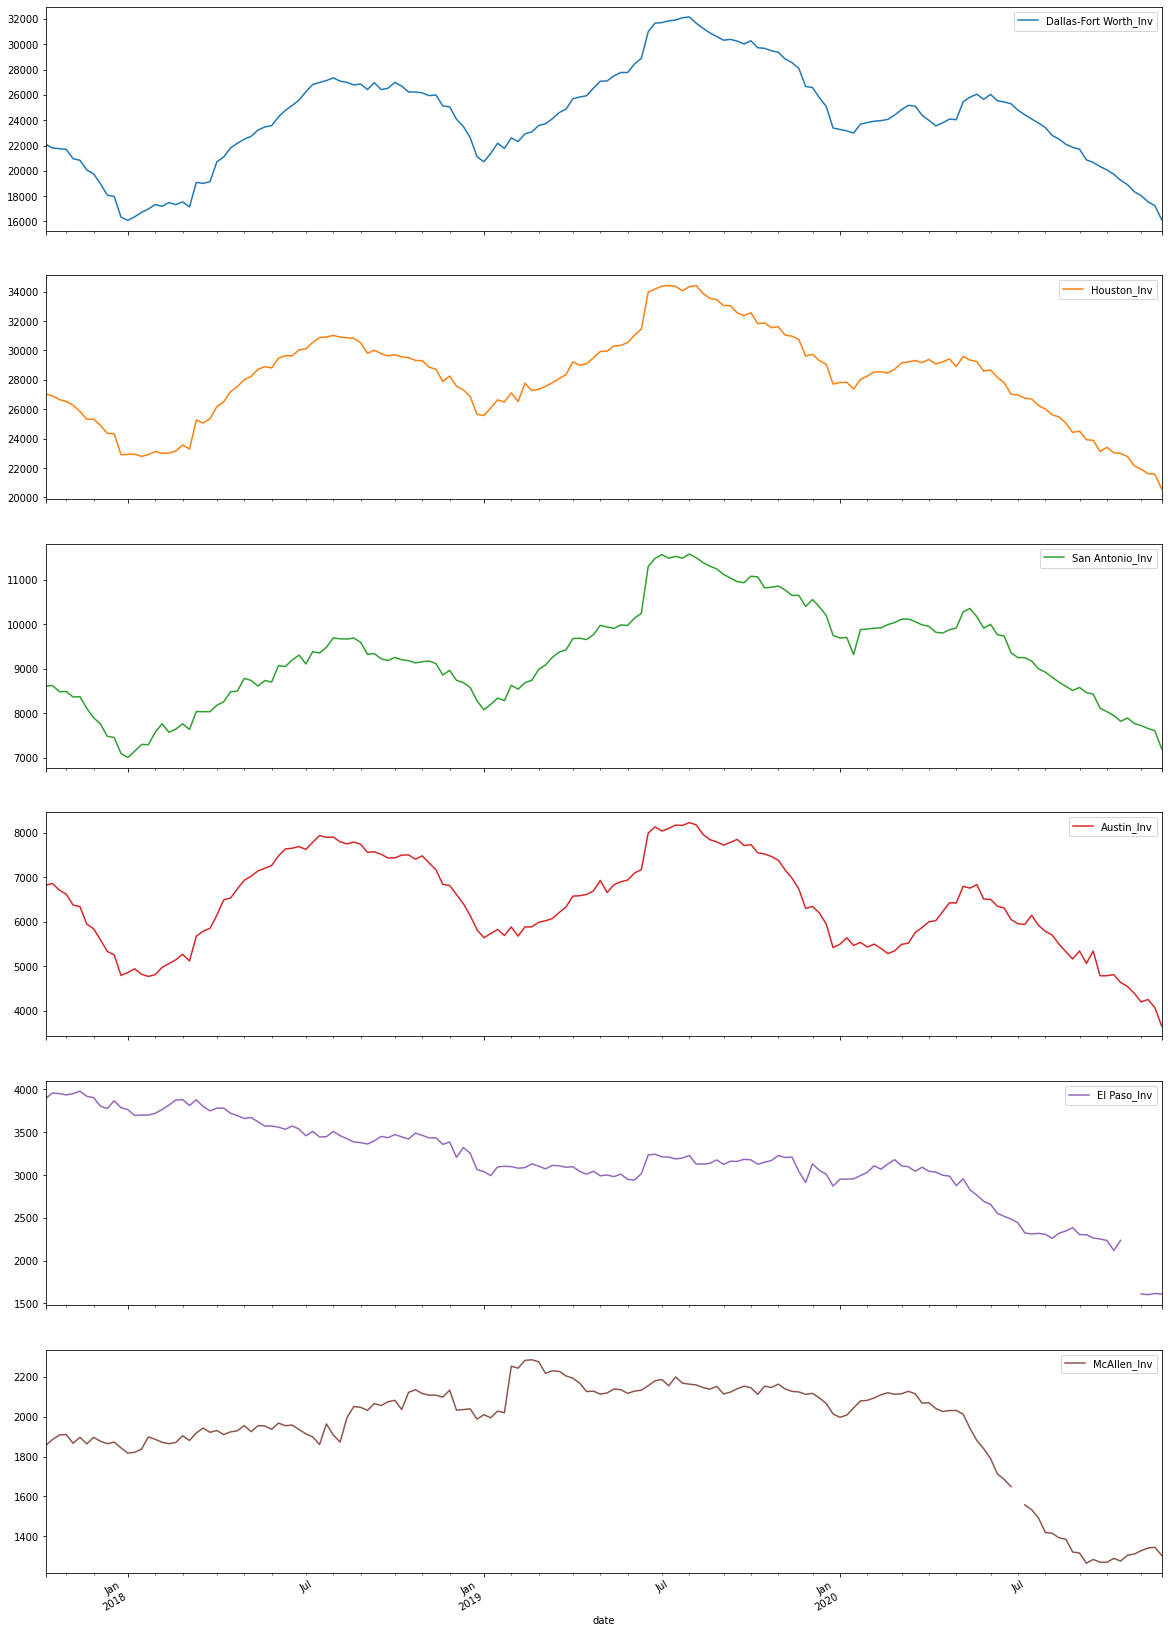

In [34]:
tx.plot(subplots=True, layout=(6,1), figsize=(20,32), sharex=True, sharey=False)

McAllen and El Paso show some missing data, we'll clean these up and interpolate the values. 


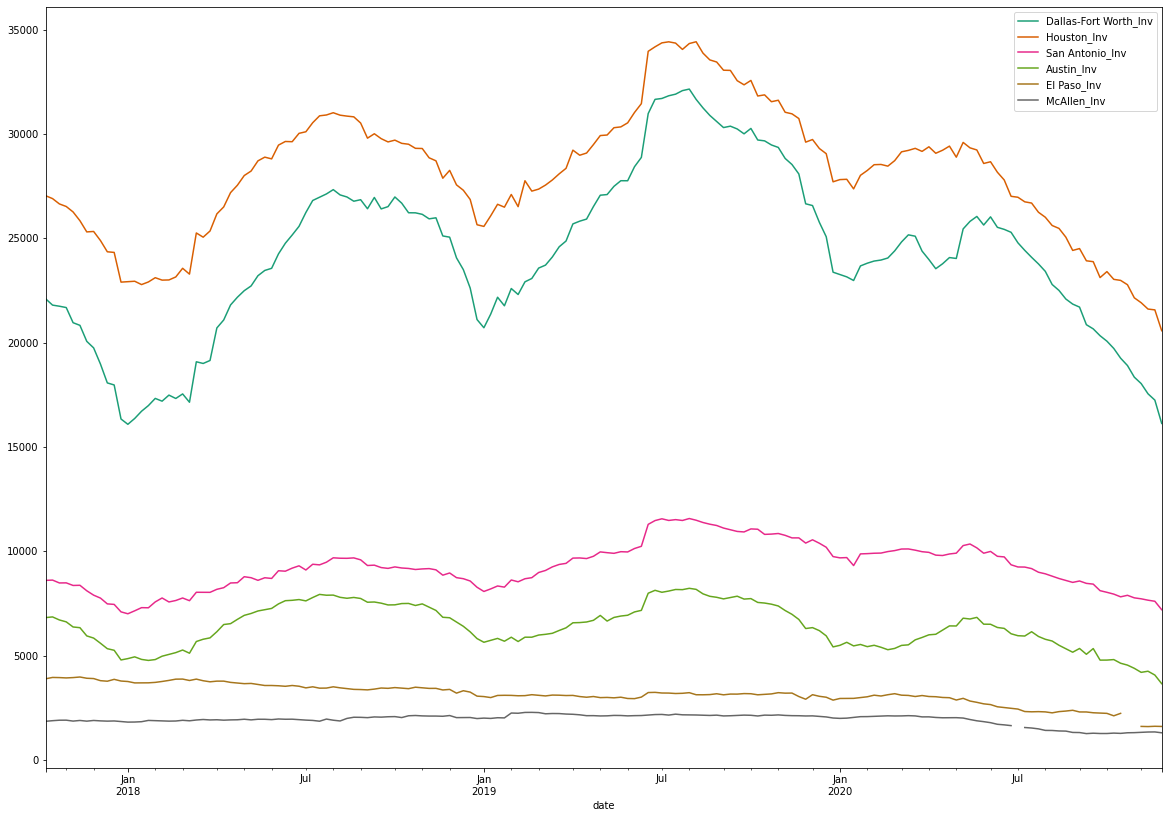

In [35]:
tx.plot(figsize=(20,14), colormap='Dark2')


In [37]:
tx.columns

Index(['Dallas-Fort Worth_Inv', 'Houston_Inv', 'San Antonio_Inv', 'Austin_Inv',
       'El Paso_Inv', 'McAllen_Inv'],
      dtype='object')

We're only missing two values from the El Paso time series and one value from the McAllen time series. We'll use a linear interpolation to fill in the missing values. 

In [38]:
tx['McAllen_Inv'].isna().sum()

1

In [39]:
tx['El Paso_Inv'].isna().sum()

2

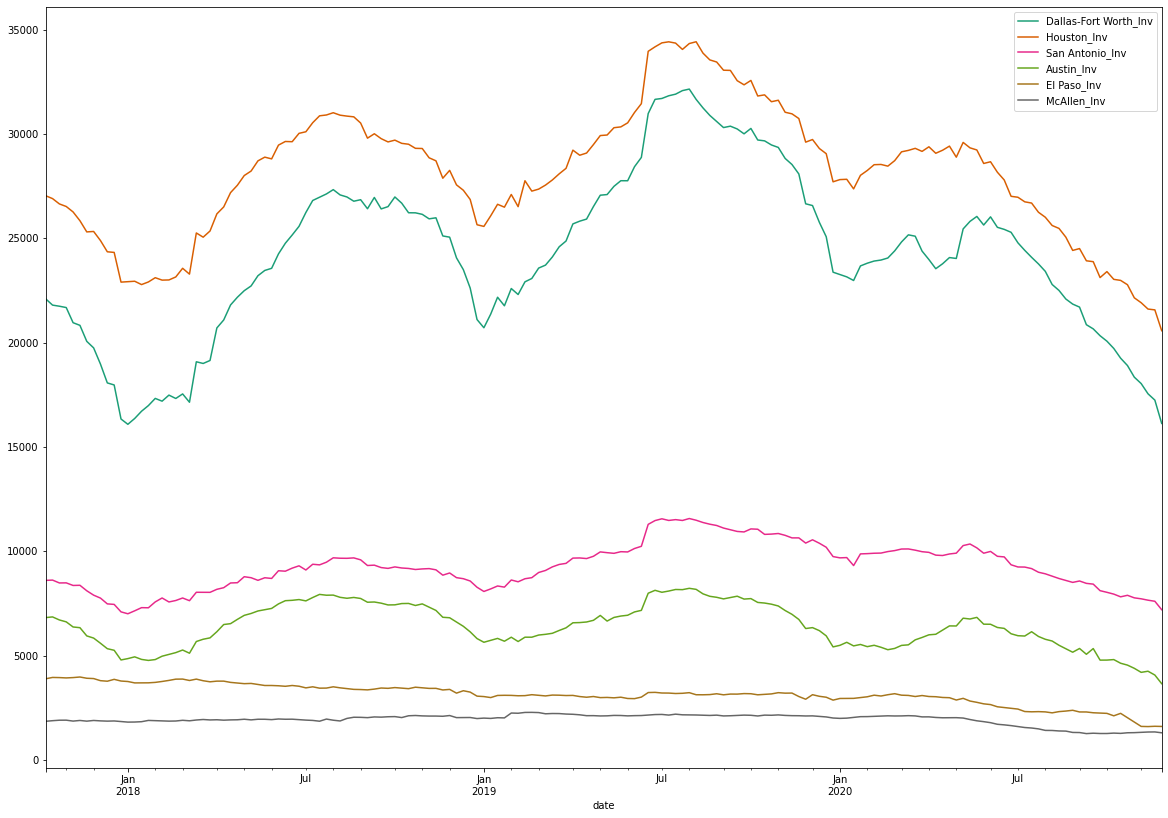

In [36]:
tx.interpolate(method='linear', limit_direction='forward', axis=0).plot(figsize=(20,14), colormap='Dark2')


The interpolation looks good, so we'll assign the new dataframe to itself. 

In [40]:
tx = tx.interpolate(method='linear', limit_direction='forward', axis=0)

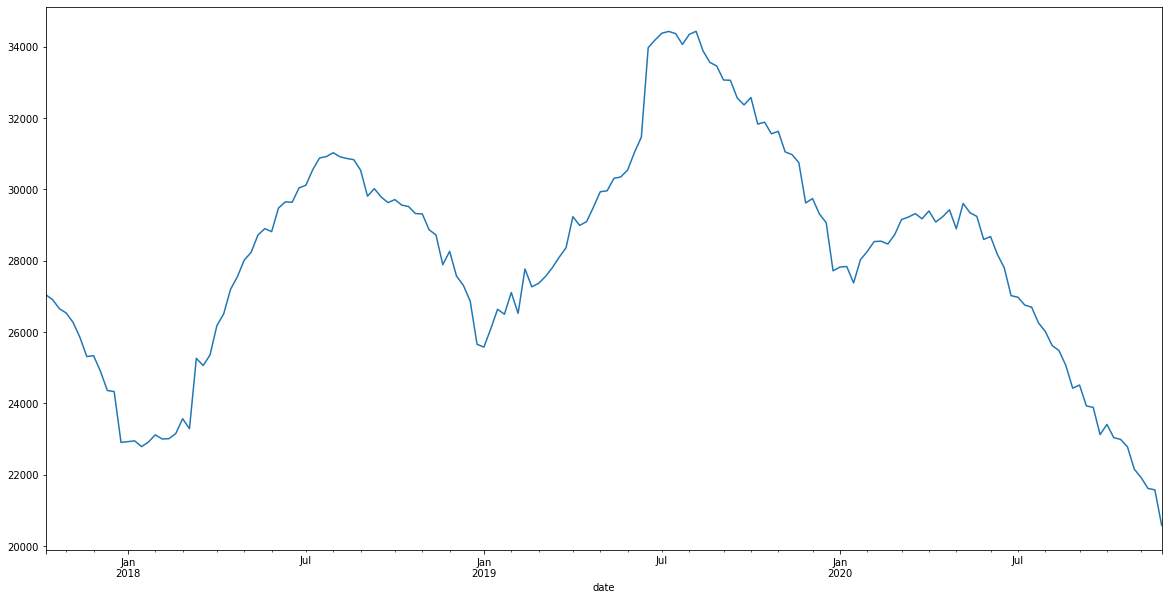

In [30]:
ax1, ax2 = plt.subplots(2, 1)
plt.figure(figsize=(20,10))
ax.plot(tx['Houston_Inv'].plot()
plt.show()
#plt.legend(bbox_to_anchor=(1.1, 1.05))


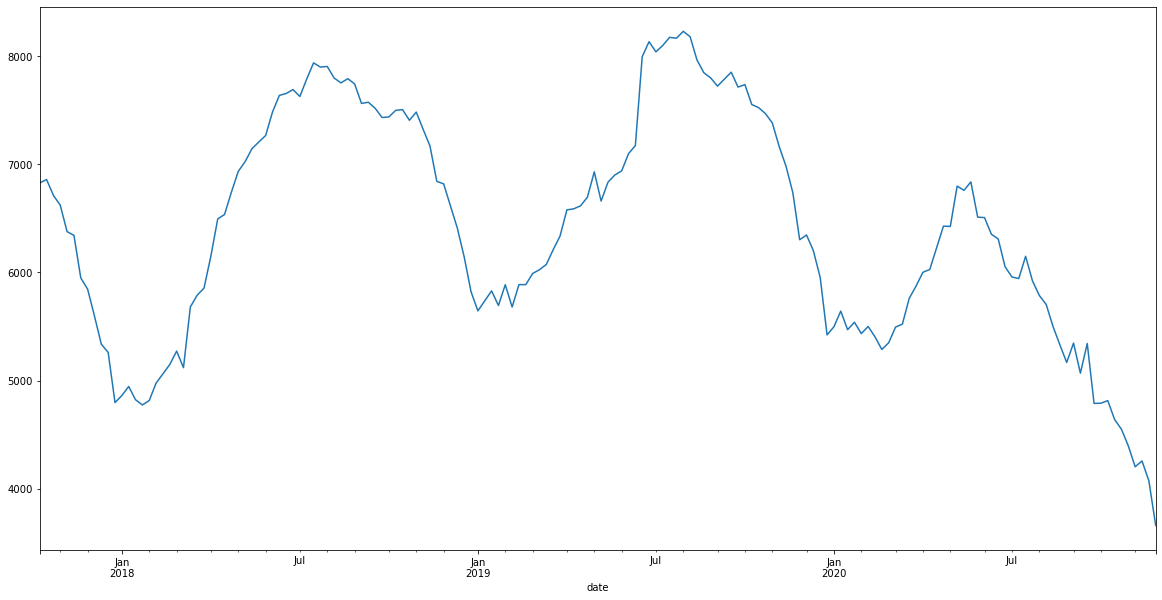

In [ ]:
plt.figure(figsize=(20,10))
tx['Austin_Inv'].plot()
plt.show()

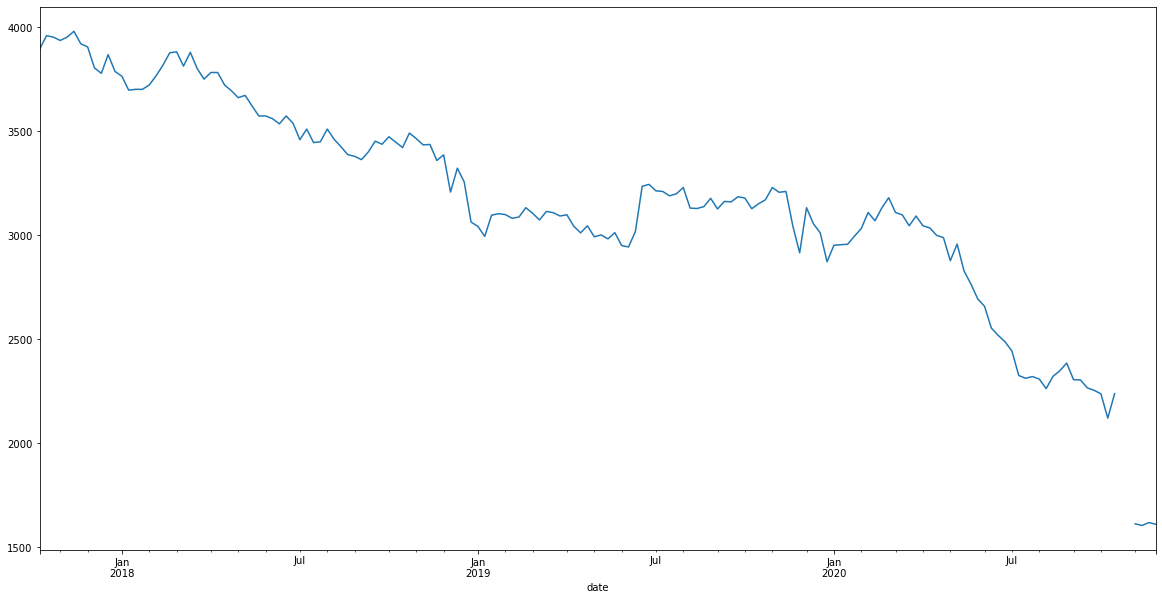

In [ ]:
plt.figure(figsize=(20,10))
tx['El Paso_Inv'].plot()
plt.show()

In [ ]:
tx['El Paso_Inv'].isna().sum()

2

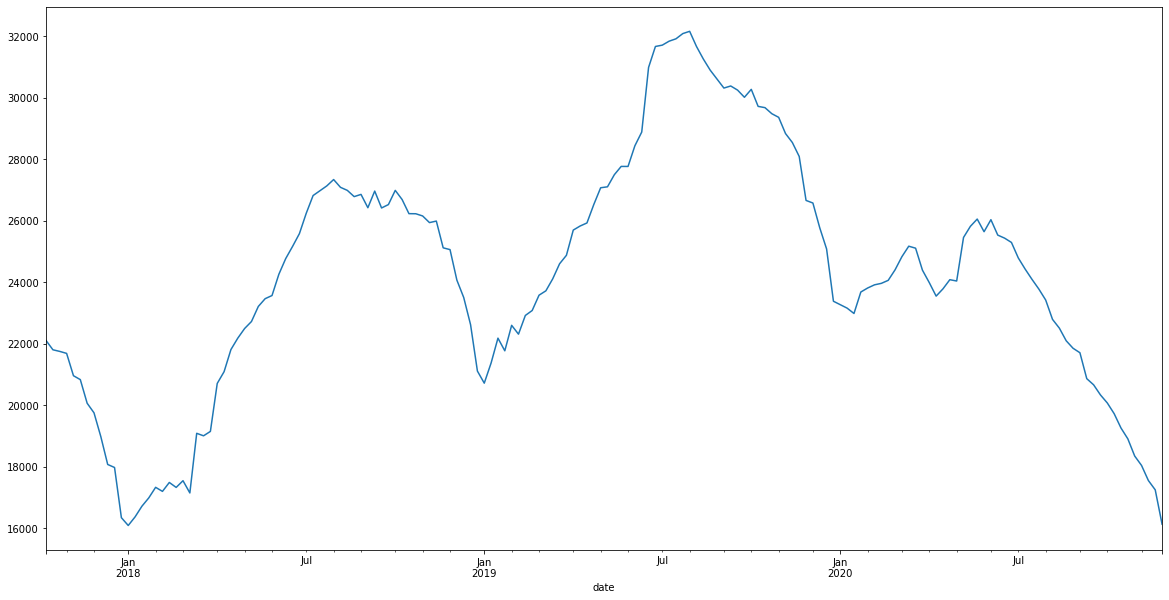

In [ ]:
plt.figure(figsize=(20,10))
tx['Dallas-Fort Worth_Inv'].plot()
plt.show()

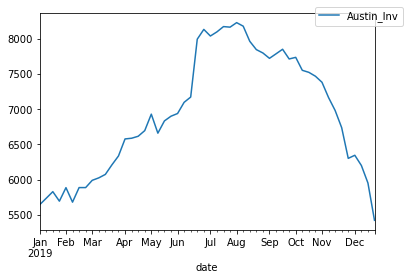

In [ ]:
fig = plt.figure()

#tx['2019']['Houston_Inv'].plot(subplots=True)
#tx['2019']['San Antonio_Inv'].plot(subplots=True)
#tx['2019']['Dallas-Fort Worth_Inv'].plot(subplots=True)
tx['2019']['Austin_Inv'].plot(subplots=True)

plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [ ]:
htx = extract_region('Houston, TX',df, drop_columns)
htx.isna().sum()


Houston_Inv    0
dtype: int64

In [ ]:
nymelt.set_index('date')
nymelt['NYC_Median_Value'] = nymelt['value']

In [ ]:
#df.drop(columns=['StateName'], axis=1, inplace=True)

In [ ]:
nymelt


,RegionName,SizeRank,StateName,variable,value,date,NY_Median_Value,NYC_Median_Value
0,"New York, NY",1,NY,2017-10-14,67462.0,2017-10-14,67462.0,67462.0
1,"New York, NY",1,NY,2017-10-21,67333.0,2017-10-21,67333.0,67333.0
2,"New York, NY",1,NY,2017-10-28,66334.0,2017-10-28,66334.0,66334.0
3,"New York, NY",1,NY,2017-11-04,65836.0,2017-11-04,65836.0,65836.0
4,"New York, NY",1,NY,2017-11-11,64317.0,2017-11-11,64317.0,64317.0
...,...,...,...,...,...,...,...,...
159,"New York, NY",1,NY,2020-10-31,64337.0,2020-10-31,64337.0,64337.0
160,"New York, NY",1,NY,2020-11-07,63000.0,2020-11-07,63000.0,63000.0
161,"New York, NY",1,NY,2020-11-14,62334.0,2020-11-14,62334.0,62334.0
162,"New York, NY",1,NY,2020-11-21,61324.0,2020-11-21,61324.0,61324.0


In [ ]:
df.head()

,SizeRank,RegionName,StateName,2017-10-14,2017-10-21,2017-10-28,2017-11-04,2017-11-11,2017-11-18,2017-11-25,...,2020-09-26,2020-10-03,2020-10-10,2020-10-17,2020-10-24,2020-10-31,2020-11-07,2020-11-14,2020-11-21,2020-11-28
0,0,United States,NaN,1329553.0,1324548.0,1308531.0,1303129.0,1286621.0,1272333.0,1234947.0,...,946262.0,931097.0,924736.0,916975.0,909612.0,891672.0,874996.0,861239.0,847452.0,802818.0
1,1,"New York, NY",NY,67462.0,67333.0,66334.0,65836.0,64317.0,63556.0,61355.0,...,65793.0,65908.0,66114.0,65429.0,65258.0,64337.0,63000.0,62334.0,61324.0,58814.0
2,2,"Los Angeles-Long Beach-Anaheim, CA",CA,18029.0,17845.0,17296.0,17018.0,16648.0,16415.0,15440.0,...,17673.0,17070.0,17188.0,17489.0,17623.0,17579.0,16702.0,16422.0,15988.0,14896.0
3,3,"Chicago, IL",IL,38109.0,37722.0,37182.0,36553.0,35480.0,34548.0,32984.0,...,31633.0,31539.0,31627.0,31178.0,30902.0,30124.0,29637.0,28873.0,28088.0,26337.0
4,4,"Dallas-Fort Worth, TX",TX,22104.0,21804.0,21751.0,21687.0,20961.0,20834.0,20066.0,...,20336.0,20075.0,19727.0,19260.0,18908.0,18350.0,18044.0,17553.0,17250.0,16133.0


In [ ]:
mdf = pd.melt(df, id_vars = ['RegionName', 'SizeRank', 'StateName'])
mdf[mdf['RegionName'] == 'Chicago, IL']

,RegionName,SizeRank,StateName,variable,value
3,"Chicago, IL",3,IL,2017-10-14,38109.0
100,"Chicago, IL",3,IL,2017-10-21,37722.0
197,"Chicago, IL",3,IL,2017-10-28,37182.0
294,"Chicago, IL",3,IL,2017-11-04,36553.0
391,"Chicago, IL",3,IL,2017-11-11,35480.0
...,...,...,...,...,...
15426,"Chicago, IL",3,IL,2020-10-31,30124.0
15523,"Chicago, IL",3,IL,2020-11-07,29637.0
15620,"Chicago, IL",3,IL,2020-11-14,28873.0
15717,"Chicago, IL",3,IL,2020-11-21,28088.0


In [ ]:
transpose = pd.DataFrame(data=df)

In [ ]:
transpose = transpose.T


In [ ]:
transpose.columns = transpose.iloc[1]

In [ ]:
transpose.head()

RegionName,United States,"New York, NY","Los Angeles-Long Beach-Anaheim, CA","Chicago, IL","Dallas-Fort Worth, TX","Philadelphia, PA","Houston, TX","Washington, DC","Miami-Fort Lauderdale, FL","Atlanta, GA",...,"Madison, WI","Lakeland, FL","Ogden, UT","Daytona Beach, FL","Des Moines, IA","Jackson, MS","Augusta, GA","Harrisburg, PA","Provo, UT","Fort Collins, CO"
SizeRank,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,94,96,100,159
RegionName,United States,"New York, NY","Los Angeles-Long Beach-Anaheim, CA","Chicago, IL","Dallas-Fort Worth, TX","Philadelphia, PA","Houston, TX","Washington, DC","Miami-Fort Lauderdale, FL","Atlanta, GA",...,"Madison, WI","Lakeland, FL","Ogden, UT","Daytona Beach, FL","Des Moines, IA","Jackson, MS","Augusta, GA","Harrisburg, PA","Provo, UT","Fort Collins, CO"
StateName,NaN,NY,CA,IL,TX,PA,TX,DC,FL,GA,...,WI,FL,UT,FL,IA,MS,GA,PA,UT,CO
2017-10-14,1.32955e+06,67462,18029,38109,22104,24244,27046,18508,43212,27153,...,2577,2742,1401,4359,3441,2204,3065,2275,1250,1751
2017-10-21,1.32455e+06,67333,17845,37722,21804,24070,26909,18231,43631,26906,...,2585,2671,1361,4401,3439,2232,3101,2257,1237,1724


In [ ]:
mdf['week'] = pd.to_datetime(mdf['variable'])
mdf.drop(columns='variable', axis=1, inplace=True)

In [ ]:
mdf.rename(columns={'value':'inventory'}, inplace=True)

In [ ]:
sat_inventory = mdf[mdf['RegionName'] == 'San Antonio, TX']
sat_inventory

,RegionName,SizeRank,StateName,inventory,week
26,"San Antonio, TX",26,TX,8610.0,2017-10-14
123,"San Antonio, TX",26,TX,8624.0,2017-10-21
220,"San Antonio, TX",26,TX,8487.0,2017-10-28
317,"San Antonio, TX",26,TX,8491.0,2017-11-04
414,"San Antonio, TX",26,TX,8367.0,2017-11-11
...,...,...,...,...,...
15449,"San Antonio, TX",26,TX,7773.0,2020-10-31
15546,"San Antonio, TX",26,TX,7727.0,2020-11-07
15643,"San Antonio, TX",26,TX,7661.0,2020-11-14
15740,"San Antonio, TX",26,TX,7609.0,2020-11-21


In [ ]:
import matplotlib as plt
import seaborn as sns

<AxesSubplot:xlabel='week'>

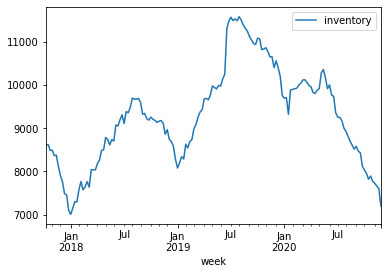

In [ ]:
sat_inventory.plot(kind='line', x='week', y='inventory')

In [ ]:
atx_inventory = mdf[mdf['RegionName'] == 'Austin, TX']

<AxesSubplot:xlabel='week'>

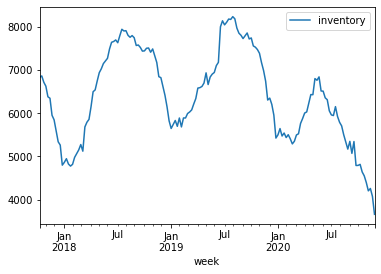

In [ ]:
atx_inventory.plot(kind='line', x='week', y='inventory')

<AxesSubplot:xlabel='week'>

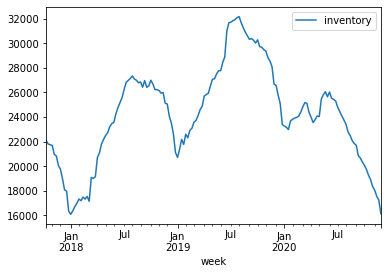

In [ ]:
dfw_inventory =  mdf[mdf['RegionName'] == 'Dallas-Fort Worth, TX']
dfw_inventory.plot(kind='line',  x='week', y='inventory')
#plt.pyplot.plot(dfw_inventory['week'], dfw_inventory['inventory'])

#sns.lineplot(data=dfw_inventory, x='week', y='inventory')

In [ ]:
dfw_inventory.dtypes

RegionName            object
SizeRank               int64
StateName             object
inventory            float64
week          datetime64[ns]
dtype: object

<AxesSubplot:xlabel='week'>

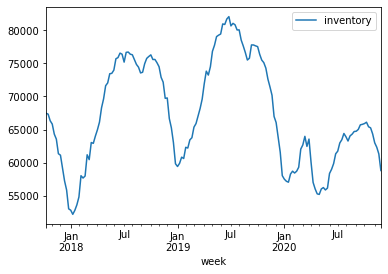

In [ ]:
nyc_inventory =  mdf[mdf['RegionName'] == 'New York, NY']

nyc_inventory.plot(kind='line',  x='week', y='inventory')

<AxesSubplot:xlabel='week'>

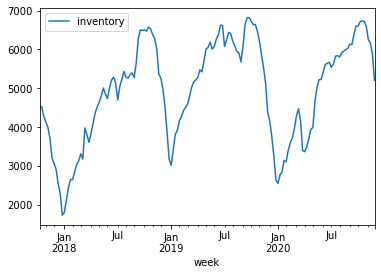

In [ ]:
sfo_inventory =  mdf[mdf['RegionName'] == 'San Francisco, CA']

sfo_inventory.plot(kind='line',  x='week', y='inventory')